In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

Trigrams and Counts

In [50]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        trigram = (ch1+ch2, ch3)
        b[trigram] = b.get(trigram, 0) +1

b

In [11]:
type(b.items())

dict_items

In [15]:
import torch
import itertools

Replace special tokens

In [113]:
N = torch.zeros((27*27, 27), dtype = torch.int32)

In [186]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [187]:
t_chars = chars.copy()
chars.insert(0, '.')

bigrams = sorted(list(set(itertools.product(chars, t_chars))))
bitoi = {''.join(s):i for i, s in enumerate(bigrams)}
# bitoi

In [188]:
len(list(itertools.product(chars, chars)))

729

In [189]:
bigram_len = len(list(itertools.product(chars, t_chars)))
bigram_len

702

In [190]:
itobi = {i:s for s, i in bitoi.items()}
itos = {i:s for s, i in stoi.items()}

In [191]:
chs

['.', 'z', 'z', 'y', 'z', 'x', '.']

In [122]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = bitoi[ch1+ch2]
        ix2 = stoi[ch3]
        N[ix1, ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

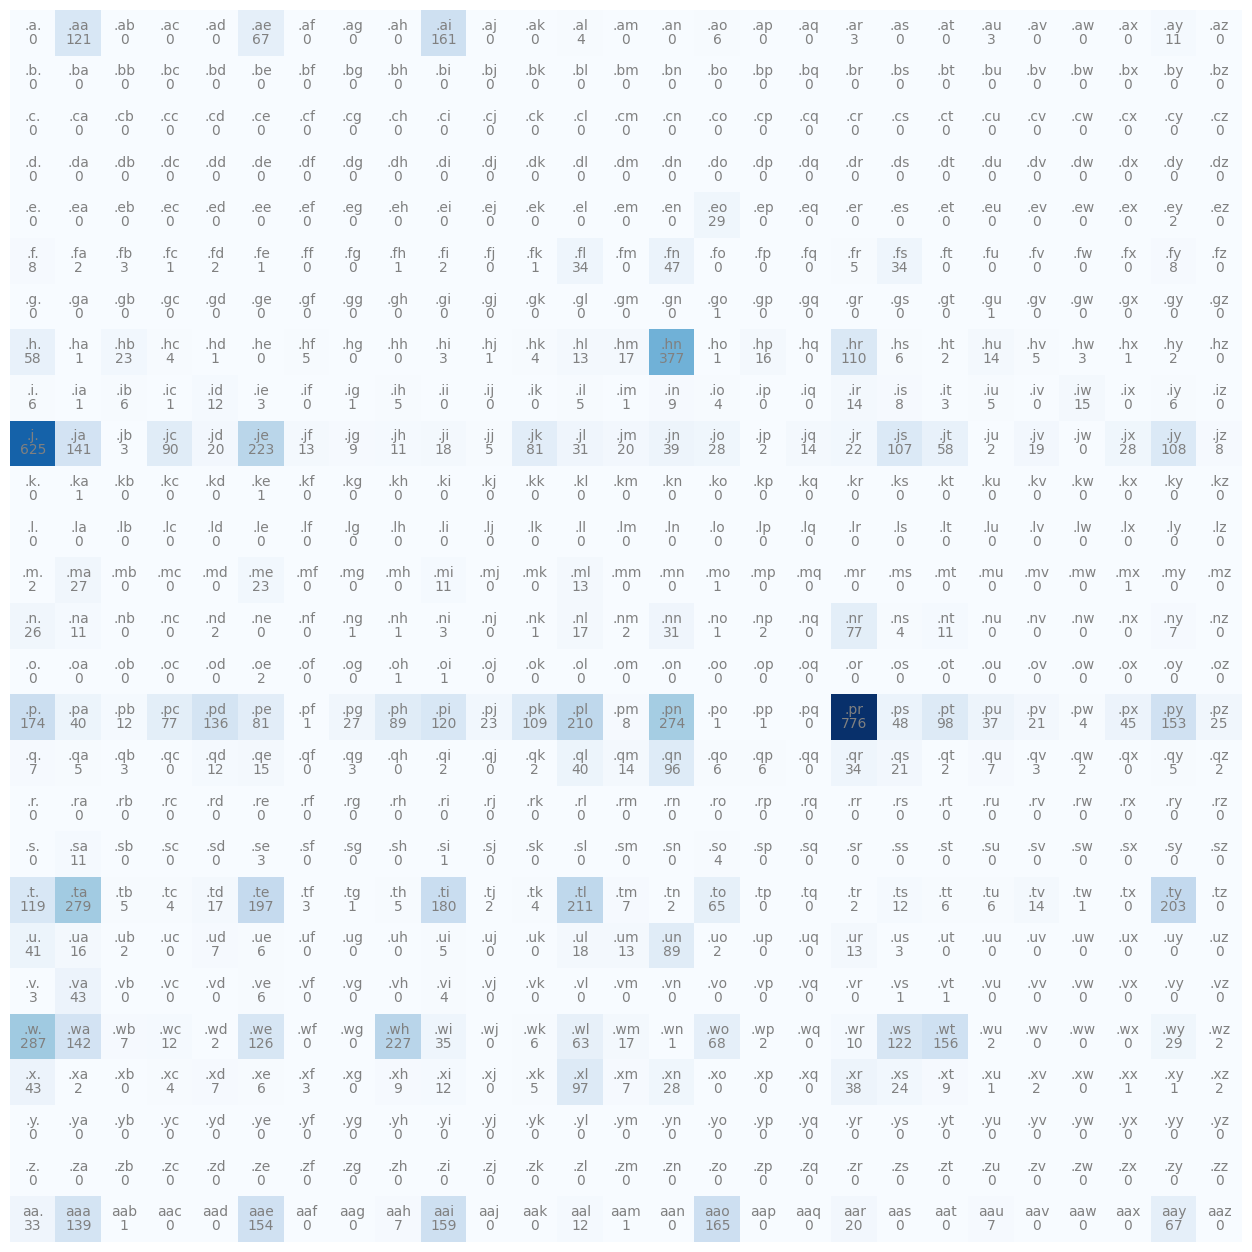

In [201]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N[:27, :27], cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itobi[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [124]:
N[0]

tensor([  0, 121,   0,   0,   0,  67,   0,   0,   0, 161,   0,   0,   4,   0,
          0,   6,   0,   0,   3,   0,   0,   3,   0,   0,   0,  11,   0],
       dtype=torch.int32)

Convert counts to probabilities

In [125]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.3218, 0.0000, 0.0000, 0.0000, 0.1782, 0.0000, 0.0000, 0.0000,
        0.4282, 0.0000, 0.0000, 0.0106, 0.0000, 0.0000, 0.0160, 0.0000, 0.0000,
        0.0080, 0.0000, 0.0000, 0.0080, 0.0000, 0.0000, 0.0000, 0.0293, 0.0000])

Sample from the multinomial dist

In [137]:
g = torch.Generator().manual_seed(42)
p = torch.rand(3, generator=g)
p = p/p.sum()
p

tensor([0.4047, 0.4197, 0.1756])

Samples

In [139]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0])

In [140]:
p = N[0].float()
p = p/p.sum()

g = torch.Generator().manual_seed(42)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

itos[ix]

'a'

In [142]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.3218, 0.0000, 0.0000, 0.0000, 0.1782, 0.0000, 0.0000, 0.0000,
        0.4282, 0.0000, 0.0000, 0.0106, 0.0000, 0.0000, 0.0160, 0.0000, 0.0000,
        0.0080, 0.0000, 0.0000, 0.0080, 0.0000, 0.0000, 0.0000, 0.0293, 0.0000])

Generate words by sampling from the dist

In [148]:
N

tensor([[  0, 121,   0,  ...,   0,  11,   0],
        [  0,   0,   0,  ...,   0,   0,   0],
        [  0,   0,   0,  ...,   0,   0,   0],
        ...,
        [  0,   0,   0,  ...,   0,   0,   0],
        [  0,   0,   0,  ...,   0,   0,   0],
        [  0,   0,   0,  ...,   0,   0,   0]], dtype=torch.int32)

In [160]:
itobi[0]

'.v'

In [172]:
torch.randint(0, len(bigrams)-1, (1, )).item()

407

In [181]:
N[0]

tensor([  0, 121,   0,   0,   0,  67,   0,   0,   0, 161,   0,   0,   4,   0,
          0,   6,   0,   0,   3,   0,   0,   3,   0,   0,   0,  11,   0],
       dtype=torch.int32)

In [222]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)
P = torch.nan_to_num(P, nan=1/N.shape[-1]) 
#when a bigram has never appreared in the data counts 
# are zero and normalized p can in nan so replace 
# with uniform prob

In [223]:
g = torch.Generator().manual_seed(42)

for i in range(20):
    out = []
    ix = torch.randint(26, (1, ), generator=g).item()
    out.append(itobi[ix])
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])

        if ix == 0:
            break
        
        ch = out[-2][-1]+out[-1]
        ix = bitoi[ch]

    print(''.join(out))

.scrniaomle.
.ohrwkedopebidg.
.eoaqxaepaqudrwnige.
.qyvjakoimaklzajo.
.fneor.
.ypxocsylap.
.o.
.nahtjrhozeo.
.uaaibh.
.mfpayhetiikkgiohc.
.aeayh.
.tiibgennaod.
.ox.
.fnatfuic.
.b.
.gearaahuaprlpsmrpibyifyqyziakztvh.
.waeqss.
.iuaqu.
.vaedgulbhysk.
.lh.


In [224]:
P[0].sum()

tensor(1.)

In [225]:
log_likelihood = 0.0
n = 0
for w in words[:5]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = bitoi[ch1+ch2]
        ix2 = stoi[ch3]
        
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f}, {logprob: .4f}')

print(f'{log_likelihood=}')

nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-87.6203)
nll=tensor(87.6203)
3.245194911956787


Summarize the quality of this model:

- Product of all these probabilities is the likelihood
- Higher likelihood is higher quality
- Negative of Log likelihood is used for this as a log func which just log of the sum or average of prob and negative of that
- Now we need to minimize the negative log-likelihood
- Here the prob are the parameters of the model and goal is to maximise the log-likelihood and minimize the NLL (log is a monotonic func)

In [32]:
#Prob of any word

log_likelihood = 0.0
n = 0
for w in ['vivekx']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f}, {logprob: .4f}')

print(f'{log_likelihood=}')

nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.v: 0.0117, -4.4449
vi: 0.3541, -1.0383
iv: 0.0152, -4.1867
ve: 0.2208, -1.5107
ek: 0.0087, -4.7426
kx: 0.0000, -inf
x.: 0.2353, -1.4469
log_likelihood=tensor(-inf)
nll=tensor(inf)
inf


kx is completely unlikely acc to model, count is zero, so loss is inf

For model smoothing to avoid inf: add 1 to all counts

In [33]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [34]:
#Prob of any word

log_likelihood = 0.0
n = 0
for w in ['vivekx']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f}, {logprob: .4f}')

print(f'{log_likelihood=}')

nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.v: 0.0118, -4.4431
vi: 0.3508, -1.0476
iv: 0.0152, -4.1845
ve: 0.2188, -1.5194
ek: 0.0088, -4.7384
kx: 0.0002, -8.5305
x.: 0.2279, -1.4788
log_likelihood=tensor(-25.9423)
nll=tensor(25.9423)
3.7060446739196777


### Bigram Neural Network

In [35]:
# create the training set of bigrams (x, y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [36]:
xs

tensor([ 0,  5, 13, 13,  1])

In [37]:
ys

tensor([ 5, 13, 13,  1,  0])

In [38]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [39]:
xenc.shape

torch.Size([5, 27])

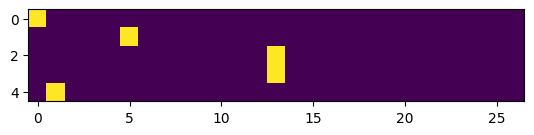

In [40]:
plt.imshow(xenc)

In [41]:
#randomly initialize 27 neuron weights, each neuron receives 27 weights
g = torch.Generator().manual_seed(2144783647)
W = torch.randn((27, 27), generator=g)
xenc @ W

tensor([[-0.6046, -0.3491,  0.2435,  0.5142,  1.5232, -0.7306,  1.1006, -0.2224,
          0.2822,  0.4698,  1.3067, -1.4517, -0.6800, -0.0976, -1.1779,  0.5034,
         -0.6409, -0.8612,  0.3433, -0.6674,  0.3300,  1.2975, -0.1127,  0.4733,
         -0.7487, -0.4654,  0.0547],
        [-1.5120,  2.0341, -0.2661,  0.0453, -0.3448,  0.0854, -0.5530,  0.0940,
         -0.1316,  0.8107, -0.2677,  0.5146,  0.9076,  0.1664,  0.6831, -0.4381,
         -1.9305,  1.4531, -0.3721,  1.4788, -0.8117, -0.6589, -0.1577, -1.6766,
          1.3930,  0.4156,  1.1409],
        [ 0.6003,  0.4835,  0.6352,  1.0967,  0.7445, -1.0002, -0.5563, -0.4766,
          0.2362, -0.6020, -0.6111,  1.1264, -0.2020,  0.3856,  0.6586, -0.5006,
         -0.5124, -0.2393, -1.1887,  0.0506,  0.8183, -0.0615,  0.2136,  0.0187,
          1.1106, -0.4152, -1.2947],
        [ 0.6003,  0.4835,  0.6352,  1.0967,  0.7445, -1.0002, -0.5563, -0.4766,
          0.2362, -0.6020, -0.6111,  1.1264, -0.2020,  0.3856,  0.6586, -0.5006

In [42]:
(xenc @ W).shape

torch.Size([5, 27])

In [43]:
# (5, 27) * (27, 27) --> (5, 27)

Exponentiate the number

In [44]:
(xenc @ W).exp()

tensor([[0.5463, 0.7053, 1.2757, 1.6723, 4.5870, 0.4816, 3.0058, 0.8006, 1.3261,
         1.5997, 3.6938, 0.2342, 0.5066, 0.9070, 0.3079, 1.6544, 0.5268, 0.4226,
         1.4096, 0.5130, 1.3909, 3.6602, 0.8934, 1.6052, 0.4730, 0.6279, 1.0562],
        [0.2205, 7.6452, 0.7663, 1.0464, 0.7084, 1.0892, 0.5752, 1.0986, 0.8767,
         2.2495, 0.7652, 1.6729, 2.4784, 1.1810, 1.9801, 0.6453, 0.1451, 4.2762,
         0.6893, 4.3875, 0.4441, 0.5174, 0.8541, 0.1870, 4.0269, 1.5152, 3.1295],
        [1.8227, 1.6217, 1.8873, 2.9943, 2.1054, 0.3678, 0.5733, 0.6209, 1.2664,
         0.5477, 0.5428, 3.0847, 0.8171, 1.4705, 1.9321, 0.6062, 0.5991, 0.7872,
         0.3046, 1.0519, 2.2667, 0.9403, 1.2381, 1.0189, 3.0360, 0.6602, 0.2740],
        [1.8227, 1.6217, 1.8873, 2.9943, 2.1054, 0.3678, 0.5733, 0.6209, 1.2664,
         0.5477, 0.5428, 3.0847, 0.8171, 1.4705, 1.9321, 0.6062, 0.5991, 0.7872,
         0.3046, 1.0519, 2.2667, 0.9403, 1.2381, 1.0189, 3.0360, 0.6602, 0.2740],
        [0.8294, 0.8629,

In [45]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)

In [46]:
probs.shape

torch.Size([5, 27])

In [47]:
probs[0].sum()

tensor(1.)

Initialize weights and one hot encode the inputs

In [48]:
g = torch.Generator().manual_seed(2144783647)
W = torch.randn((27, 27), generator=g)

xenc = F.one_hot(xs, num_classes=27).float()
xenc = xenc @ W

#Normalization to 0-1 with softmax
counts = logits.exp()
probs = counts/counts.sum(1, keepdim=True)

In [49]:
probs.shape

torch.Size([5, 27])

In [50]:
nlls = torch.zeros(5)

for i in range(5):
    # i-th bigram
    x = xs[i].item() #index of input char
    y = ys[i].item() #index of label char
    print("===================================")
    print(f'bigram {i+1}:: {itos[x]}{itos[y]} (indexes {x}, {y})')
    print(f'Input to the NN: {x}')
    print(f'Output probs from the NN: {probs[i]}')
    print(f'Next char: {y}')
    p = probs[i, y]
    print(f'Prob assigned by NN to the correct char: {p.item()}')
    logp = torch.log(p)
    print('Log likelihood: ', logp)
    nll = -logp
    print('negative log likelihood: ', nll.item())
    nlls[i] = nll

print('++++++++++++++++++++++++++++++++++++++++++')
print('Average NLL, loss: ', nll.mean().item())

bigram 1:: .e (indexes 0, 5)
Input to the NN: 0
Output probs from the NN: tensor([0.0152, 0.0197, 0.0356, 0.0466, 0.1278, 0.0134, 0.0838, 0.0223, 0.0370,
        0.0446, 0.1029, 0.0065, 0.0141, 0.0253, 0.0086, 0.0461, 0.0147, 0.0118,
        0.0393, 0.0143, 0.0388, 0.1020, 0.0249, 0.0447, 0.0132, 0.0175, 0.0294])
Next char: 5
Prob assigned by NN to the correct char: 0.013421350158751011
Log likelihood:  tensor(-4.3109)
negative log likelihood:  4.310908317565918
bigram 2:: em (indexes 5, 13)
Input to the NN: 5
Output probs from the NN: tensor([0.0049, 0.1692, 0.0170, 0.0232, 0.0157, 0.0241, 0.0127, 0.0243, 0.0194,
        0.0498, 0.0169, 0.0370, 0.0549, 0.0261, 0.0438, 0.0143, 0.0032, 0.0947,
        0.0153, 0.0971, 0.0098, 0.0115, 0.0189, 0.0041, 0.0891, 0.0335, 0.0693])
Next char: 13
Prob assigned by NN to the correct char: 0.02614535577595234
Log likelihood:  tensor(-3.6441)
negative log likelihood:  3.6440837383270264
bigram 3:: mm (indexes 13, 13)
Input to the NN: 13
Output probs 

Forward pass

In [51]:
g = torch.Generator().manual_seed(2144783647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [52]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W

#Normalization to 0-1 with softmax
counts = logits.exp()
probs = counts/counts.sum(1, keepdims=True)

loss = -probs[torch.arange(5), ys].log().mean()

In [53]:
loss

tensor(3.5940, grad_fn=<NegBackward0>)

Backward pass

In [54]:
W.grad = None #zero grad
loss.backward()

In [55]:
W.grad.shape

torch.Size([27, 27])

In [56]:
W.data += -0.1 * W.grad

In [57]:
loss

tensor(3.5940, grad_fn=<NegBackward0>)

Full Training Loop

In [72]:
# create the training set of bigrams (x, y)
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('Num of examples: ', num)

Num of examples:  228146


In [73]:
g = torch.Generator().manual_seed(2144783647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [79]:
#Grad descent

for k in range(100):

    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W

    #Normalization to 0-1 with softmax
    counts = logits.exp()
    probs = counts/counts.sum(1, keepdims=True)

    loss = -probs[torch.arange(num), ys].log().mean()

    W.grad = None #zero grad
    loss.backward()
 
    W.data += -50 * W.grad

In [80]:
loss

tensor(2.4621, grad_fn=<NegBackward0>)

- The loss here approaches the count based approach done earlier which is the best case scenario

- This grad descent approach is however scalable and can be applied when we need to look many more prev chars for prediction

Regularization

- Minimise the weights, distribution is smoother

In [82]:
(W**2).mean()

tensor(2.0998, grad_fn=<MeanBackward0>)

In [83]:
for k in range(100):

    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W

    #Normalization to 0-1 with softmax
    counts = logits.exp()
    probs = counts/counts.sum(1, keepdims=True)

    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()

    W.grad = None #zero grad
    loss.backward()
 
    W.data += -50 * W.grad

Pred from NN model

In [90]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))


13
15
18
0
mor.
1
24
24
0
axx.
13
9
14
1
25
13
15
18
25
12
5
19
0
minaymoryles.
11
15
14
4
12
1
9
19
1
8
0
kondlaisah.
1
14
3
8
20
8
9
26
1
18
9
5
0
anchthizarie.
